Introduction to Matplotlib
Get straight into plotting data, that's what we're focused on.

Video 0 will be concepts and contain details like anatomy of a figure. The rest of the videos will be pure code based.

Concepts in Matplotlib
2 ways of creating plots (pyplot & OO) - use the OO method
Plotting data (NumPy arrays), line, scatter, bar, hist, subplots
Plotting data directly with Pandas (using the pandas matplotlib wrapper)
Plotting data (pandas DataFrames) with the OO method, line, scatter, bar, hist, subplots
Cutomizing your plots, limits, colors, styles, legends
Saving plots

# Concepts in Matplotlib

    * What is Matplotlib?
    * Why Matplotlib?
    * Anatomy of a figure
    * Where does Matplotlib fit into the ecosystem?
    * A Matplotlib workflow

## 2 ways of creating plots
    pyplot()
    OO - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
    Matplotlib recommends the OO API
    https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
    https://matplotlib.org/3.1.1/tutorials/introductory/lifecycle.html
    Start by importing Matplotlib and setting up the %matplotlib inline magic command.

In [2]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt

[]

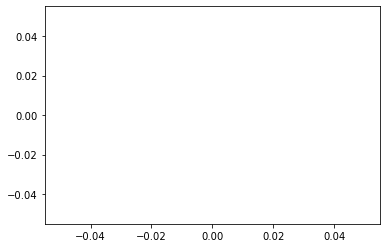

In [3]:
# Create a simple plot, without the semi-colon
plt.plot()

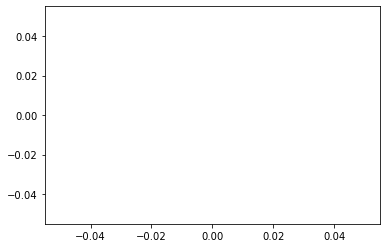

In [4]:
# With the semi-colon
plt.plot();

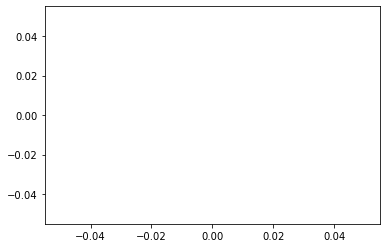

In [5]:
# You could use plt.show() if you want
plt.plot()
plt.show()

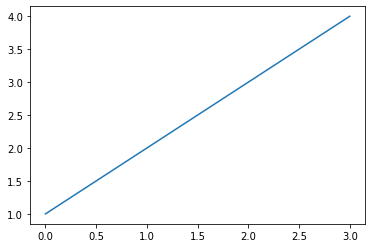

In [6]:
# Let's add some data
plt.plot([1, 2, 3, 4])

In [7]:
# Create some data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

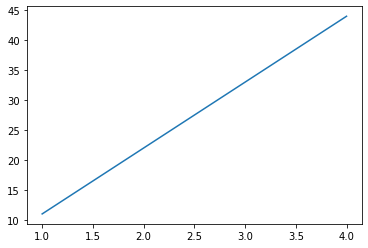

In [8]:
# With a semi-colon and now a y value
plt.plot(x, y);

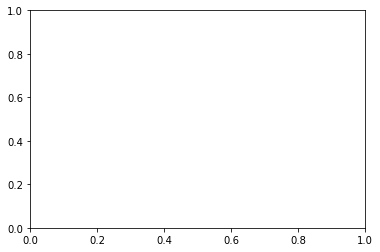

In [9]:
# Creating a plot with the OO verison, confusing way first
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

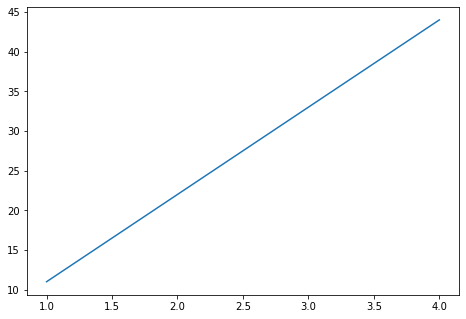

In [10]:
# Confusing #2
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

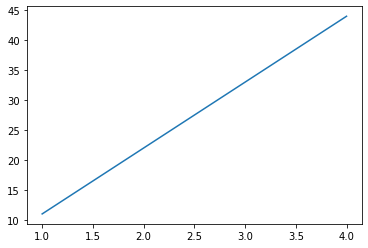

In [11]:
# Easier and more robust going forward (what we're going to use)
fig, ax = plt.subplots()
ax.plot(x, y);

In [12]:
# This is where the object orientated name comes from 
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

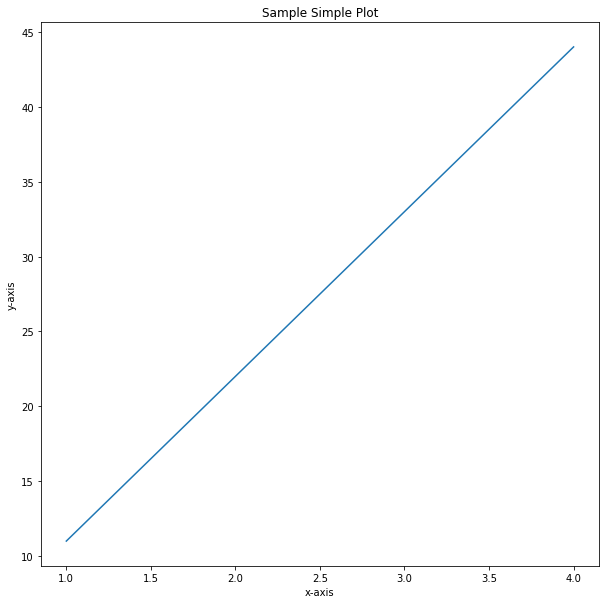

In [13]:
# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("simple-plot.png")

# Making the most common type of plots using NumPy arrays

    Most of figuring out what kind of plot to use is getting a feel for the data, then see what suits it best.
    Matplotlib visualizations are built off NumPy arrays. So in this section we'll build some of the most common types of plots using NumPy arrays.

        line
        scatter
        bar
        hist
        subplots()
    To make sure we have access to NumPy, we'll import it as np.

In [14]:
import numpy as np

## Line
Line is the default type of visualization in Matplotlib. Usually, unless specified otherwise, your plots will start out as lines.

In [15]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

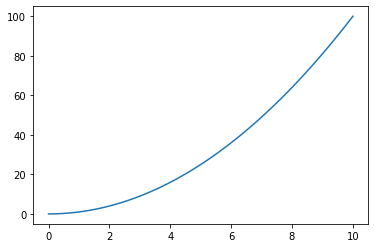

In [16]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

## Scatte

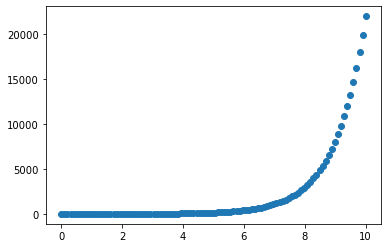

In [17]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

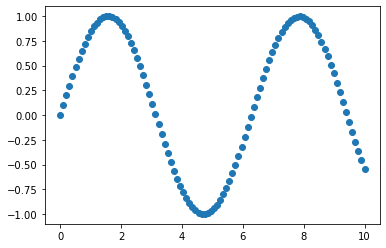

In [18]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

### Bar
    Vertical
    Horizontal

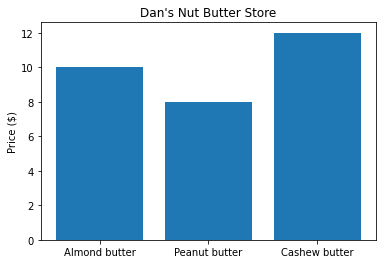

In [19]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

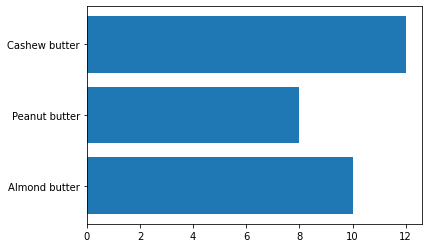

In [20]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

### Histogram (hist)
    Could show image of normal distribution here

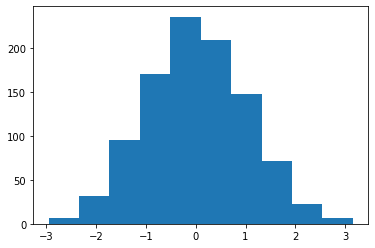

In [21]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

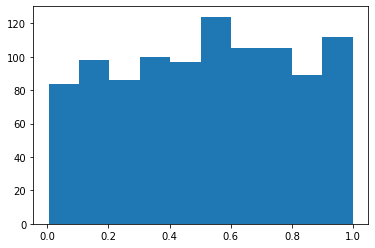

In [22]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

### Subplots

    Multiple plots on one figure https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

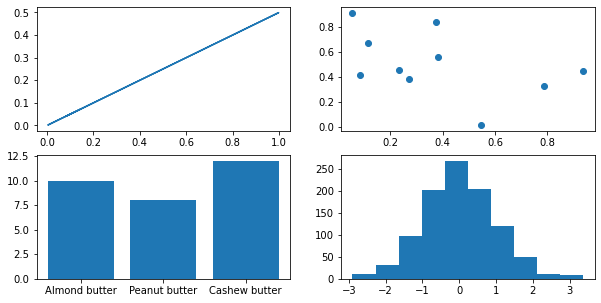

In [23]:
# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

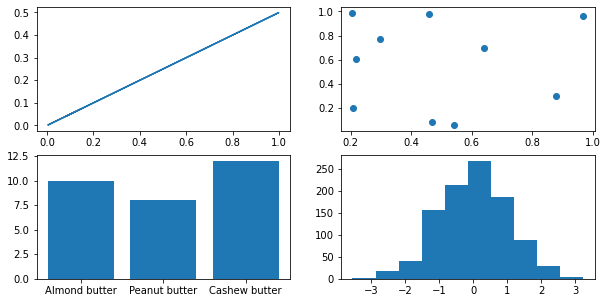

In [24]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

# Plotting data directly with pandas
This section uses the pandas pd.plot() method on a DataFrame to plot columns directly.

https://datatofish.com/plot-dataframe-pandas/
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

    line

    scatter
    bar
    hist
    df.plot(subplots=True, figsize=(6, 6))
    To plot data with pandas, we first have to import it as pd.

In [25]:
import pandas as pd

In [26]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("../DataSet/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Line
    Concept
    DataFrame Often, reading things won't make sense. Practice writing code for yourself, get it out of the docs and into your workspace. See what happens when you run it.

    Let's start with trying to replicate the pandas visualization documents.

In [27]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01    0.108315
2020-01-02    0.508392
2020-01-03    0.894072
2020-01-04   -1.066871
2020-01-05   -1.010631
                ...   
2022-09-22   -0.859441
2022-09-23    1.603289
2022-09-24    0.473053
2022-09-25   -0.594147
2022-09-26    1.254544
Freq: D, Length: 1000, dtype: float64

In [28]:
# What does cumsum() do?
ts.cumsum()

2020-01-01     0.108315
2020-01-02     0.616707
2020-01-03     1.510779
2020-01-04     0.443907
2020-01-05    -0.566724
                ...    
2022-09-22   -34.054193
2022-09-23   -32.450904
2022-09-24   -31.977851
2022-09-25   -32.571999
2022-09-26   -31.317454
Freq: D, Length: 1000, dtype: float64

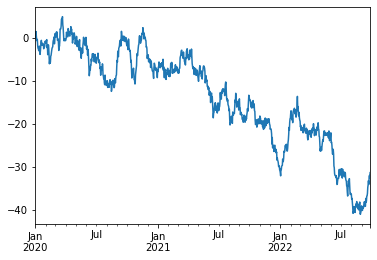

In [29]:
ts.cumsum().plot();

Working with actual data


    Let's do a little data manipulation on our mobile_sales DataFrame.

In [30]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [31]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [32]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2021", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2021-01-01
1,Honda,Red,87899,4,5000,2021-01-02
2,Toyota,Blue,32549,3,7000,2021-01-03
3,BMW,Black,11179,5,22000,2021-01-04
4,Nissan,White,213095,4,3500,2021-01-05
5,Toyota,Green,99213,4,4500,2021-01-06
6,Honda,Blue,45698,4,7500,2021-01-07
7,Honda,Blue,54738,4,7000,2021-01-08
8,Toyota,White,60000,4,6250,2021-01-09
9,Nissan,White,31600,4,9700,2021-01-10


In [33]:
# Make total sales column (doesn't work, adds as string)
#car_sales["Total Sales"] = car_sales["Price"].cumsum()

# Oops... want them as int's not string
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2021-01-01,4000
1,Honda,Red,87899,4,5000,2021-01-02,9000
2,Toyota,Blue,32549,3,7000,2021-01-03,16000
3,BMW,Black,11179,5,22000,2021-01-04,38000
4,Nissan,White,213095,4,3500,2021-01-05,41500
5,Toyota,Green,99213,4,4500,2021-01-06,46000
6,Honda,Blue,45698,4,7500,2021-01-07,53500
7,Honda,Blue,54738,4,7000,2021-01-08,60500
8,Toyota,White,60000,4,6250,2021-01-09,66750
9,Nissan,White,31600,4,9700,2021-01-10,76450


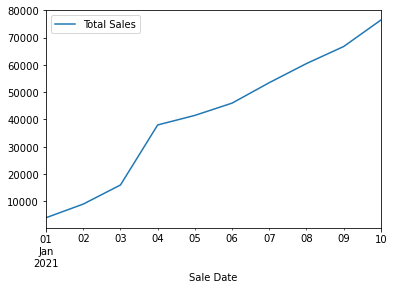

In [34]:
car_sales.plot(x='Sale Date', y='Total Sales');

In [44]:
    #     - 'line' : line plot (default)
    #     - 'bar' : vertical bar plot
    #     - 'barh' : horizontal bar plot
    #     - 'hist' : histogram
    #     - 'box' : boxplot
    #     - 'kde' : Kernel Density Estimation plot
    #     - 'density' : same as 'kde'
    #     - 'area' : area plot
    #     - 'pie' : pie plot
    #     - 'scatter' : scatter plot
    #     - 'hexbin' : hexbin plot
# car_sales.plot(x='Price', y='Doors', kind = 'pie');
# car_sales.plot(x='Price', y='Total Sales', kind = 'hexbin');

## Scatter
    Concept
    DataFrame

In [45]:
# Doesn't work
# car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

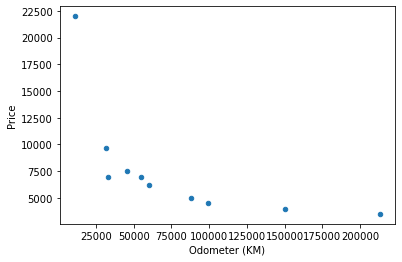

In [46]:
# Convert Price to int
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind='scatter');

## Bar
    Concept
    DataFrame

In [47]:
x = np.random.rand(10, 4)
x

array([[0.43418541, 0.76281553, 0.54408089, 0.49474826],
       [0.16591822, 0.98902384, 0.29331761, 0.10571171],
       [0.43349223, 0.59869392, 0.65319098, 0.82718393],
       [0.34786682, 0.69569025, 0.69645744, 0.97035183],
       [0.94338636, 0.01392598, 0.71027671, 0.85183878],
       [0.52310747, 0.9337126 , 0.90361893, 0.38916144],
       [0.79032416, 0.29324653, 0.52220142, 0.51795879],
       [0.08503558, 0.87349698, 0.0278234 , 0.99218789],
       [0.55534512, 0.69682443, 0.96225184, 0.99222284],
       [0.38648091, 0.14153712, 0.99071548, 0.0720568 ]])

In [48]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.434185,0.762816,0.544081,0.494748
1,0.165918,0.989024,0.293318,0.105712
2,0.433492,0.598694,0.653191,0.827184
3,0.347867,0.695690,0.696457,0.970352
4,0.943386,0.013926,0.710277,0.851839
5,0.523107,0.933713,0.903619,0.389161
6,0.790324,0.293247,0.522201,0.517959
7,0.085036,0.873497,0.027823,0.992188
8,0.555345,0.696824,0.962252,0.992223
9,0.386481,0.141537,0.990715,0.072057


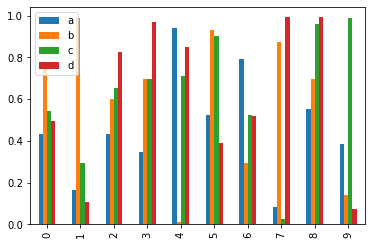

In [49]:
df.plot.bar();

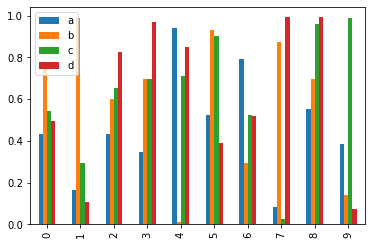

In [50]:
# Can do the same thing with 'kind' keyword
df.plot(kind='bar');

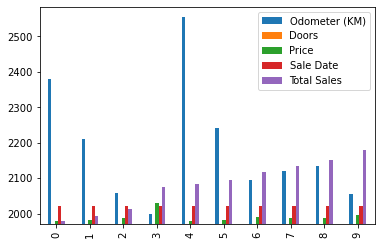

In [52]:
car_sales.plot(kind='bar');

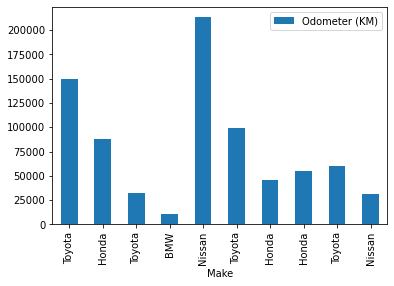

In [51]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

## Histograms

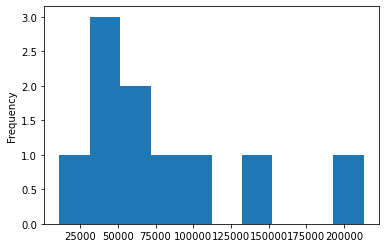

In [53]:
car_sales["Odometer (KM)"].plot.hist();

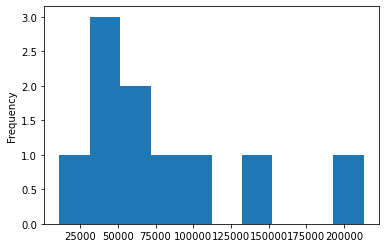

In [54]:
car_sales["Odometer (KM)"].plot(kind="hist");

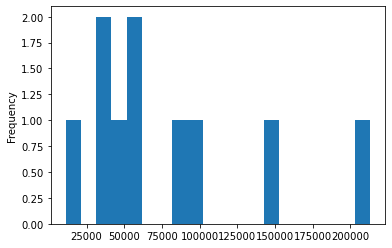

In [55]:
# Default number of bins is 10 
car_sales["Odometer (KM)"].plot.hist(bins=20);

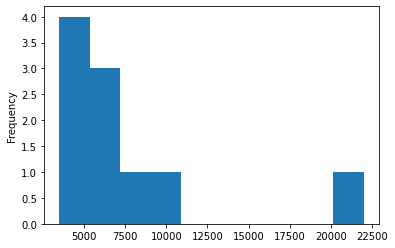

In [56]:
car_sales["Price"].plot.hist(bins=10);

In [58]:
# Let's try with another dataset
heart_disease = pd.read_csv("../DataSet/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


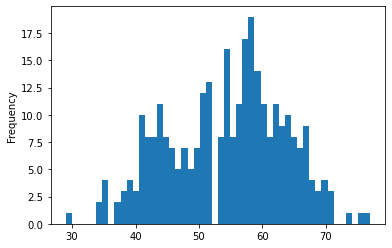

In [60]:
heart_disease["age"].plot.hist(bins=50);

## Subplots
    Concept
    DataFrame

In [61]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


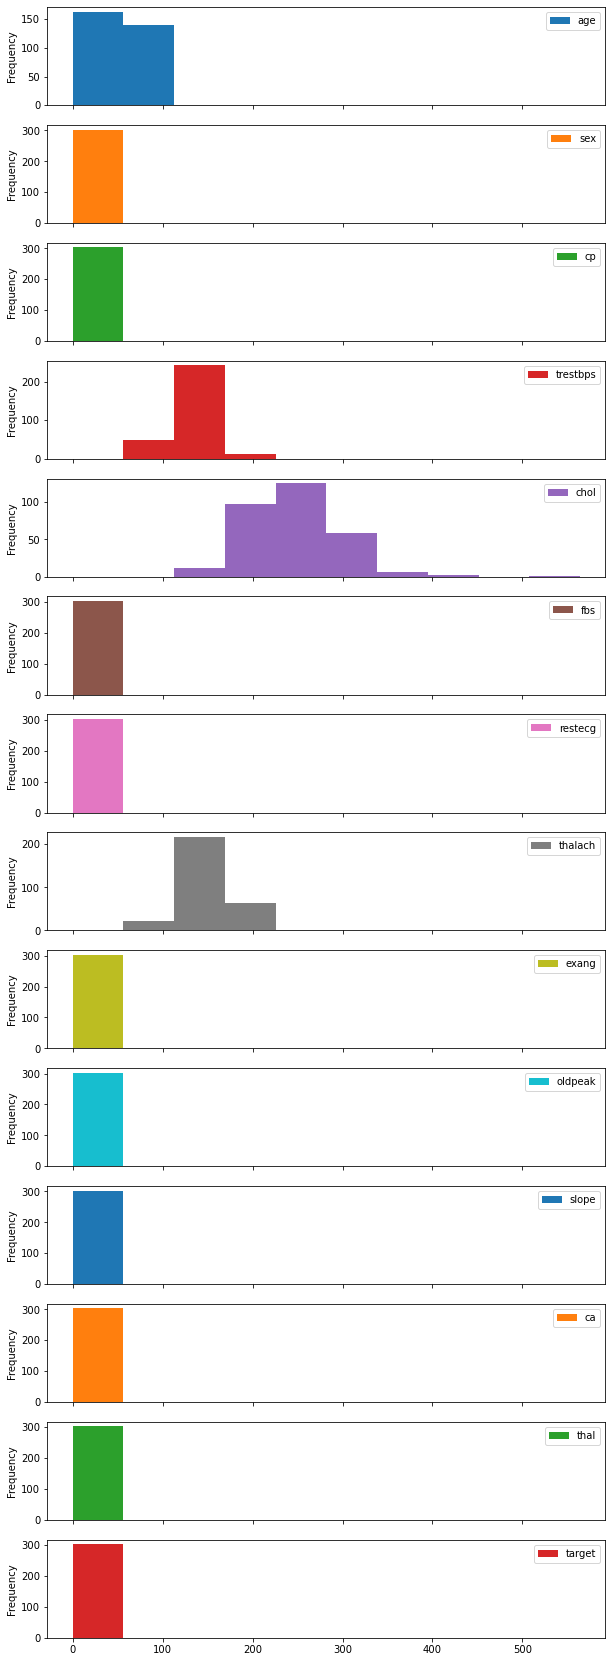

In [62]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

# 4. Plotting with pandas using the OO method
For more complicated plots, you'll want to use the OO method.

In [63]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


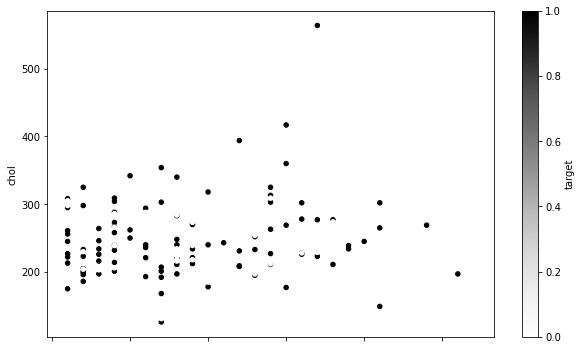

In [64]:
over_50.plot(kind='scatter', 
             x='age', 
             y='chol', 
             c='target', 
             figsize=(10, 6));

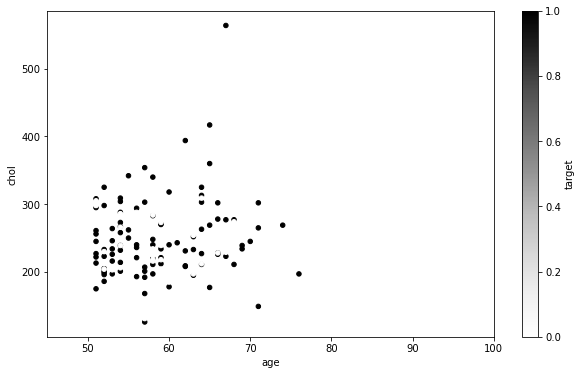

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', 
             x="age", 
             y="chol", 
             c='target', 
             ax=ax);
ax.set_xlim([45, 100]);

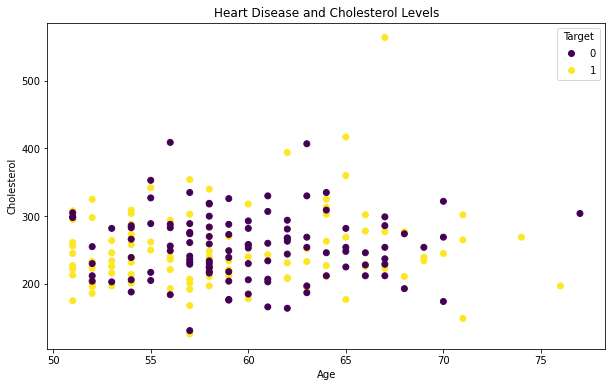

In [66]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target");

What if we wanted a horizontal line going across with the mean of heart_disease["chol"]?

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html

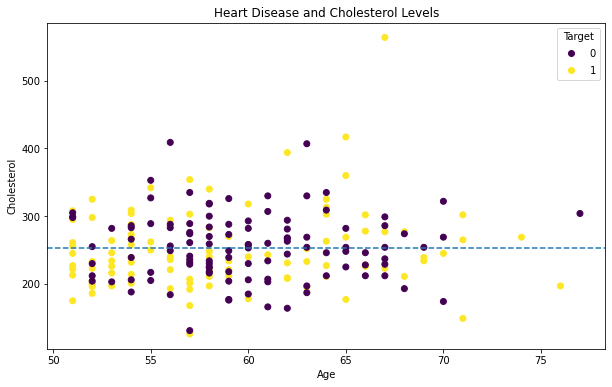

In [67]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

## Adding another plot to existing styled one

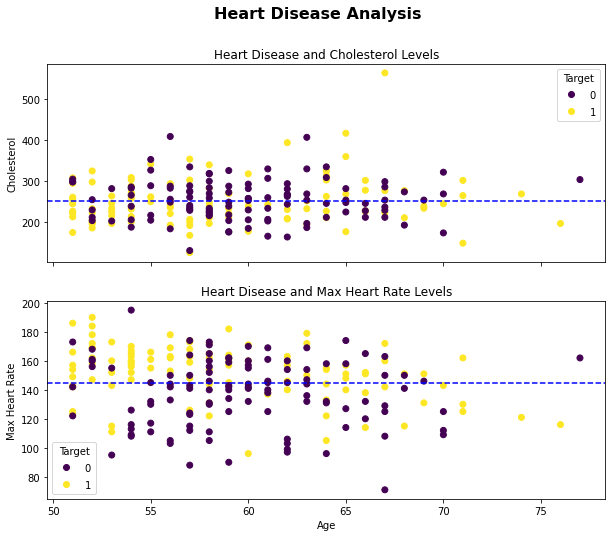

In [69]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

# Customizing your plots
limits (xlim, ylim), colors, styles, legends

## Style

In [70]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

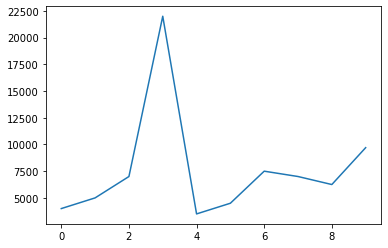

In [71]:
# Plot before changing style
car_sales["Price"].plot();

In [72]:
# Change the style... 
plt.style.use('seaborn-whitegrid')

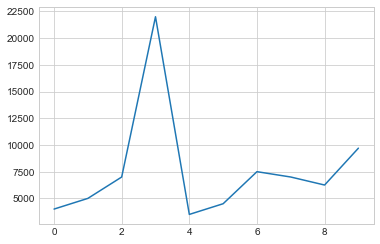

In [73]:
car_sales["Price"].plot();

In [74]:
plt.style.use('seaborn')

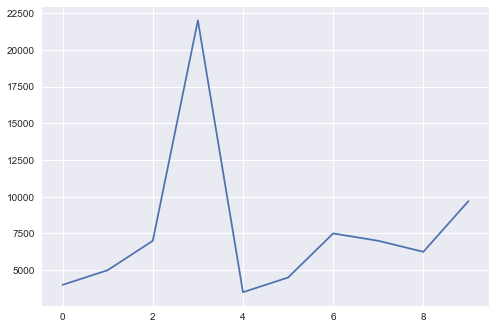

In [75]:
car_sales["Price"].plot();

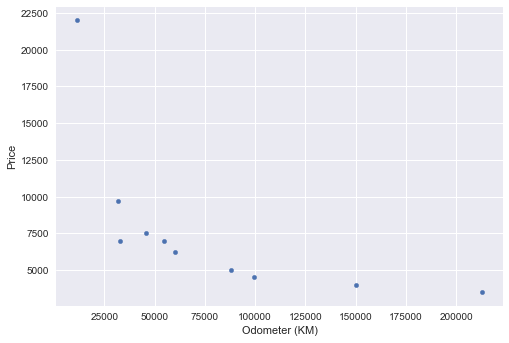

In [76]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [77]:
plt.style.use('ggplot')

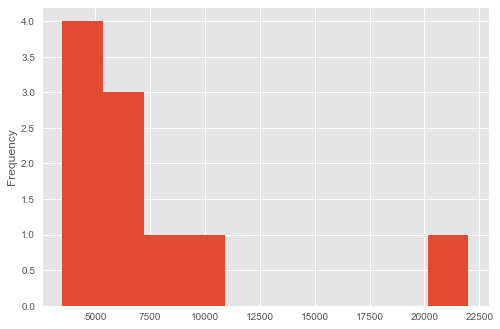

In [78]:
car_sales["Price"].plot.hist();


## Changing the title, legend, axes

In [80]:
x = np.random.randn(10, 4)
x

array([[ 6.74317420e-01,  1.19054138e+00, -2.79913416e-01,
         6.93667453e-01],
       [-1.15067752e+00,  2.77126261e-01, -4.28158646e-02,
         4.04011642e-01],
       [-8.50405047e-01, -6.12446906e-01, -1.46301564e-01,
         3.01773590e-03],
       [-4.13099920e-01,  4.48208109e-01,  8.18296600e-01,
         2.44350505e-01],
       [ 3.87957172e-01, -1.09529261e+00, -4.72764859e-02,
        -2.29176834e-01],
       [-7.76087327e-01, -4.49056182e-01, -9.30121678e-02,
         4.08351205e-01],
       [ 3.04560696e-01, -1.67029791e+00, -2.65263270e-01,
         3.31443851e+00],
       [-1.45441412e-01,  1.26302293e-01,  6.83828311e-01,
        -8.24971194e-01],
       [ 8.88815781e-01,  4.41131253e-02, -1.96818737e+00,
        -1.43325927e-01],
       [-1.97614649e-01, -8.30103307e-02, -3.91349119e-01,
         1.22442887e+00]])

In [81]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.674317,1.190541,-0.279913,0.693667
1,-1.150678,0.277126,-0.042816,0.404012
2,-0.850405,-0.612447,-0.146302,0.003018
3,-0.413100,0.448208,0.818297,0.244351
4,0.387957,-1.095293,-0.047276,-0.229177
5,-0.776087,-0.449056,-0.093012,0.408351
6,0.304561,-1.670298,-0.265263,3.314439
7,-0.145441,0.126302,0.683828,-0.824971
8,0.888816,0.044113,-1.968187,-0.143326
9,-0.197615,-0.083010,-0.391349,1.224429


matplotlib.axes._subplots.AxesSubplot

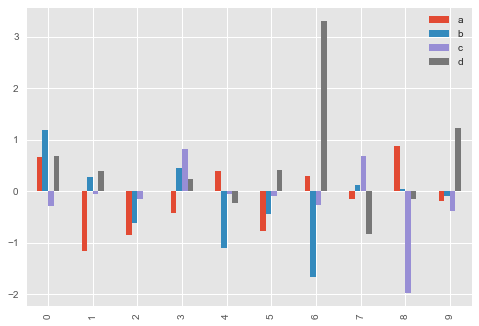

In [82]:
ax = df.plot(kind='bar')
type(ax)

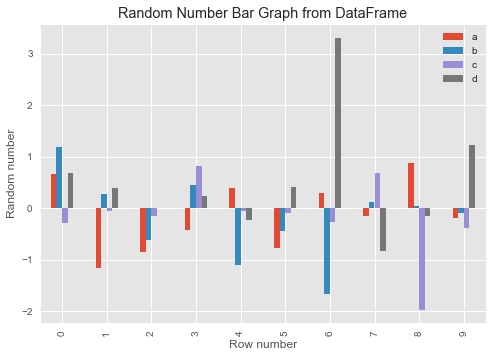

In [83]:
ax = df.plot(kind='bar')
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number")
ax.legend().set_visible(True)

## Changing the cmap

In [84]:
plt.style.use('seaborn-whitegrid')

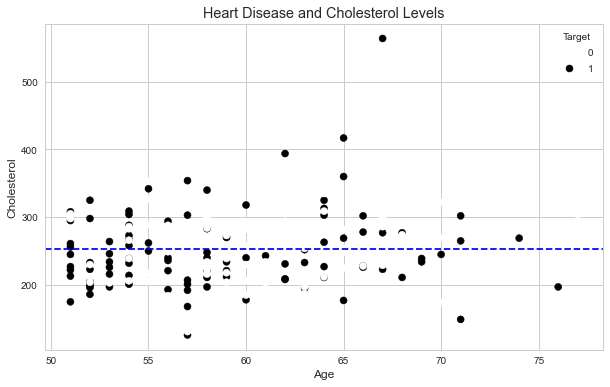

In [85]:
# No cmap change
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.axhline(y=over_50["chol"].mean(), 
           c='b', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

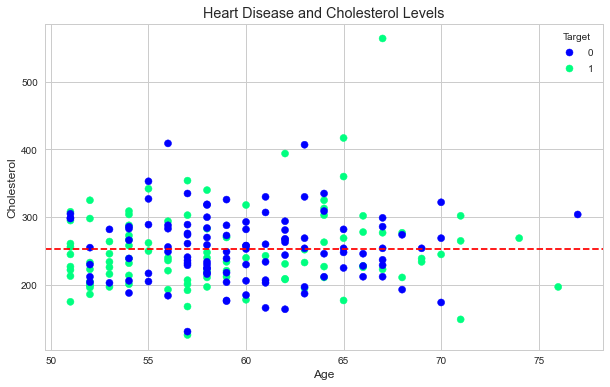

In [86]:
# Change cmap and horizontal line to be a different colour
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"], 
                     cmap="winter")
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.axhline(y=over_50["chol"].mean(), 
           color='r', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

## Changing the xlim & ylim

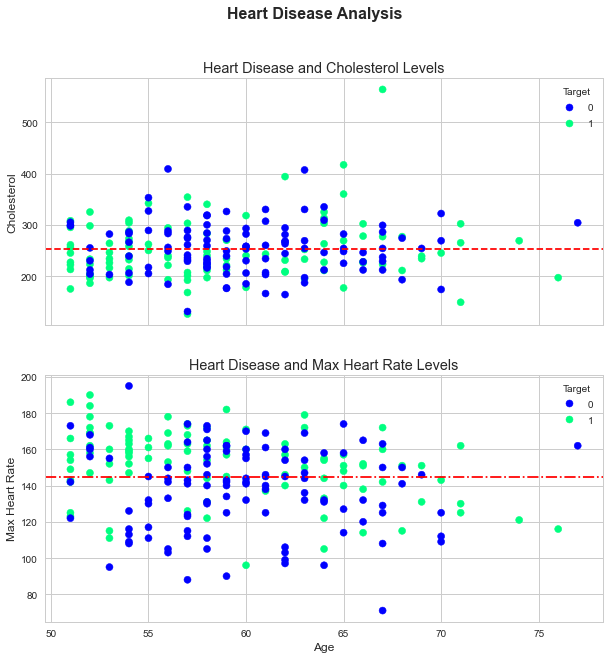

In [106]:
## Before the change (we've had color updates)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='-.', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

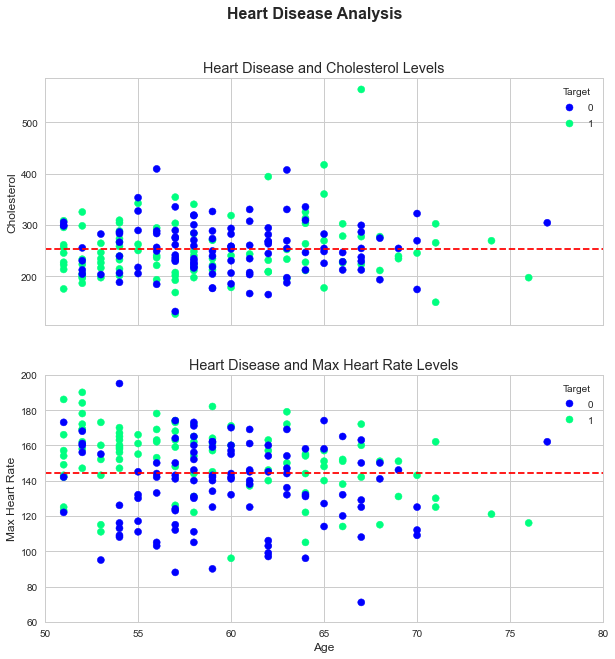

In [88]:
## After adding in different x & y limitations

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

# Saving plots
    Saving plots to images using figsave()

If you're doing something like this often, to save writing excess code, you might put it into a function.

A function which follows the Matplotlib workflow.

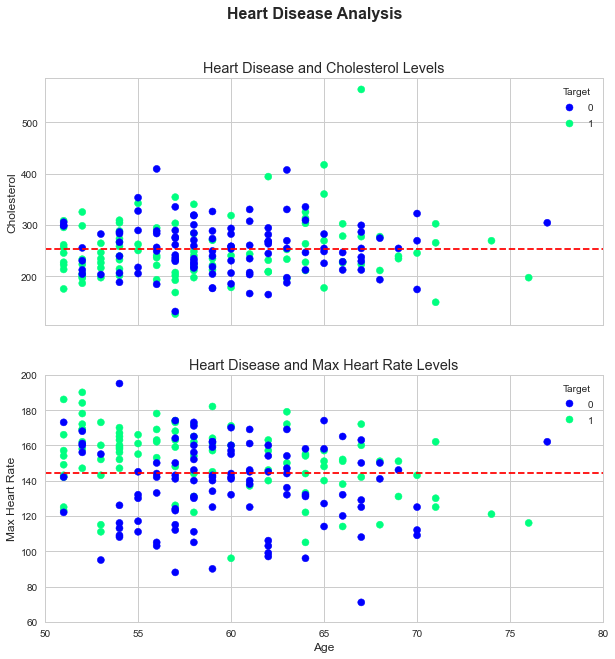

In [89]:
# Axis 0, 1 (row 0, column 0)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [90]:
# Check the supported filetypes
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

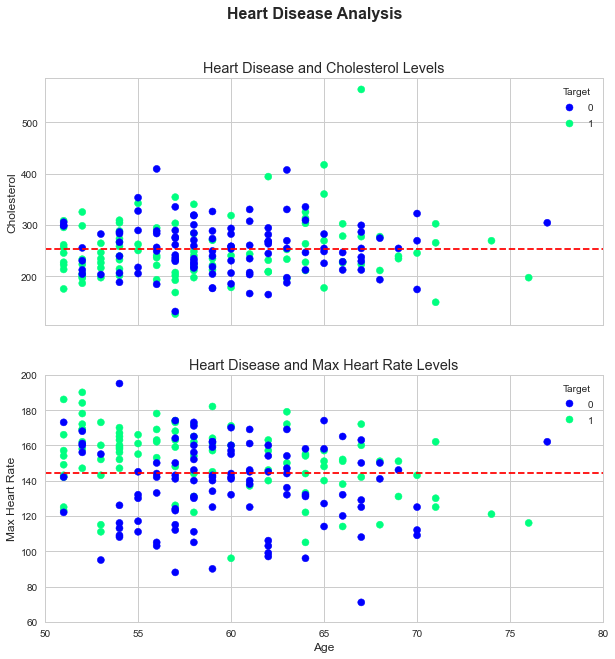

In [91]:
fig

In [93]:
# Save the file
fig.savefig("heart-disease-analysis.png")

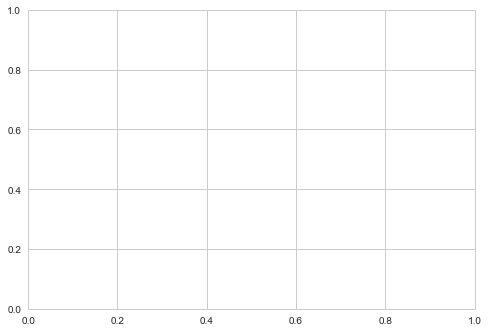

In [94]:
# Resets figure
fig, ax = plt.subplots()

In [95]:
# Potential function

def plotting_workflow(data):
    # 1. Manipulate data
    
    # 2. Create plot
    
    # 3. Plot data
    
    # 4. Customize plot
    
    # 5. Save plot
    
    # 6. Return plot
    
    return plotting_workflow